In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Data loading
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizing the data


2.Implementing feed forward neural network
obj-to learn how to develop a feed ford network 
theory-A feedforward neural network, also known as a multilayer perceptron (MLP), is a type of artificial neural network commonly used in machine learning and deep learning. It is a foundational and widely used architecture for various tasks, including classification, regression, and function approximation.

Key characteristics of a feedforward neural network include:

1. **Feedforward Structure:** Information flows in one direction, from the input layer to the output layer, without any cycles or loops. This is in contrast to recurrent neural networks (RNNs) that allow for feedback loops.

2. **Layers:** A typical feedforward neural network consists of three main types of layers: an input layer, one or more hidden layers, and an output layer. The input layer receives the raw data or features, the hidden layers process the data, and the output layer produces the network's prediction.

3. **Neurons (Nodes):** Neurons are the fundamental units of computation in a neural network. Each neuron in a layer is connected to every neuron in the previous layer (fully connected). Neurons perform weighted summations of their inputs, apply an activation function, and pass the result to the next layer.

4. **Weights and Biases:** The connections between neurons have associated weights and biases. These weights are learned during the training process to adjust the network's performance.

5. **Activation Functions:** Each neuron typically applies an activation function to the weighted sum of its inputs. Common activation functions include the sigmoid, ReLU (Rectified Linear Unit), and tanh functions. These functions introduce non-linearity into the model, allowing it to learn complex patterns.

6. **Training:** Feedforward neural networks are trained using techniques like backpropagation and gradient descent. The network's weights are adjusted iteratively to minimize a loss function, making the network's predictions more accurate.

7. **Loss Function:** A loss function measures the error between the network's predictions and the actual target values. The goal of training is to minimize this loss.

8. **Optimization Algorithms:** Various optimization algorithms, such as stochastic gradient descent (SGD) and its variants, are used to update the weights during training.

9. **
Hyperparameters:** The architecture of the network, including the number of layers, the number of neurons in each layer, the choice of activation functions, and other hyperparameters, needs to be set based on the specific problem and dataset.

Feedforward neural networks are universal function approximators, meaning they can learn and approximate a wide range of complex functions. They have been used in many applications, including image and speech recognition, natural language processing, and more. However, they have certain limitations, such as difficulty in handling sequential data (for which recurrent neural networks are more suitable) and sensitivity to the choice of hyperparameters during training.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

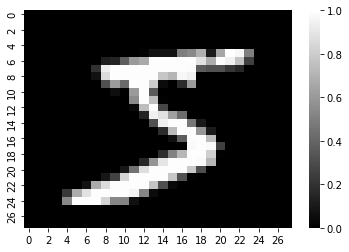

In [3]:
sns.heatmap(x_train[0], cmap='gray')
plt.show()

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dropout(0.2),  # Adjust the dropout value as needed, e.g., 0.2 for 20% dropout
    Dense(10, activation="softmax")  # Assuming you want 10 units for 10 classes and a softmax activation
])

In [5]:

predictions = model.predict(x_train[:1])
print(predictions)
print(tf.nn.softmax(predictions).numpy())

1/1 [==============================] - 1s 732ms/step
[[0.15179627 0.14315663 0.03647582 0.13228387 0.13003364 0.08924159
  0.06815899 0.05329464 0.13490824 0.06065026]]
[[0.10522898 0.10432375 0.09376749 0.10319561 0.10296366 0.09884807
  0.09678591 0.09535789 0.10346679 0.09606189]]


In [6]:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


C:\Users\praga\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 15s 6ms/step - loss: 0.2939 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1433 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1084 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0882 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0756 - accuracy: 0.9760


In [8]:
# Assuming you have defined and compiled the model as shown earlier

# Making predictions
predictions = model.predict(x_train[:1])
print(predictions)
print(tf.nn.softmax(predictions).numpy())

# Defining loss function and compiling the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

# Training the model
model.fit(x_train, y_train, epochs=5)

1/1 [==============================] - 0s 365ms/step
[[1.7749960e-10 5.5252773e-08 1.3215626e-07 1.5369828e-02 2.7090201e-17
  9.8463005e-01 1.1002601e-12 4.1512699e-08 2.5205366e-10 5.0281457e-08]]
[[0.0855263  0.0855263  0.08552631 0.08685098 0.0855263  0.22893862
  0.0855263  0.0855263  0.0855263  0.0855263 ]]
Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.0679 - accuracy: 0.9779
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0582 - accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0552 - accuracy: 0.9817
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0486 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0452 - accuracy: 0.9849


In [9]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0691 - accuracy: 0.9796 - 2s/epoch - 6ms/step


[0.06913923472166061, 0.9796000123023987]